Using TensorFlow backend.


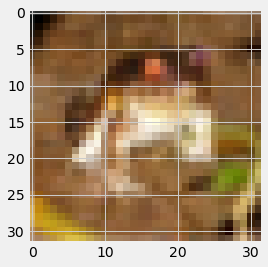

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

img = plt.imshow(x_train[0])

In [2]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[0][0]])

The image class is:  frog


In [3]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 691us/step - loss: 1.8038 - accuracy: 0.3173 - val_loss: 1.4938 - val_accuracy: 0.4556
Epoch 2/10
40000/40000 [==============================] - 28s 712us/step - loss: 1.3778 - accuracy: 0.4947 - val_loss: 1.2548 - val_accuracy: 0.5492
Epoch 3/10
40000/40000 [==============================] - 28s 707us/step - loss: 1.2236 - accuracy: 0.5627 - val_loss: 1.1227 - val_accuracy: 0.6081
Epoch 4/10
40000/40000 [==============================] - 27s 677us/step - loss: 1.0896 - accuracy: 0.6126 - val_loss: 1.0992 - val_accuracy: 0.6117
Epoch 5/10
40000/40000 [==============================] - 27s 679us/step - loss: 0.9966 - accuracy: 0.6507 - val_loss: 0.9995 - val_accuracy: 0.6500
Epoch 6/10
40000/40000 [==============================] - 27s 678us/step - loss: 0.9168 - accuracy: 0.6779 - val_loss: 1.0267 - val_accuracy: 0.6443
Epoch 7/10
40000/40000 [==============================] 

In [8]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 2s 223us/step


0.694100022315979

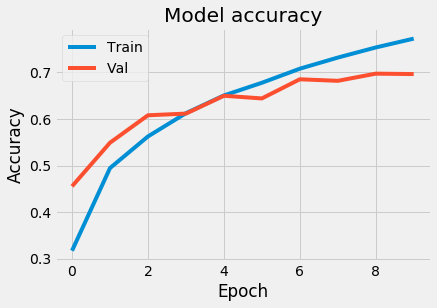

In [9]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

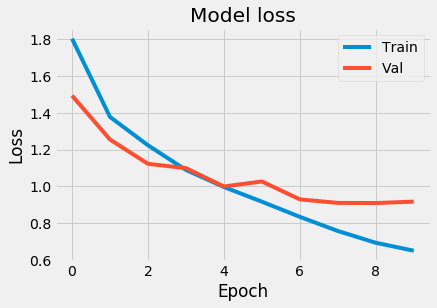

In [10]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

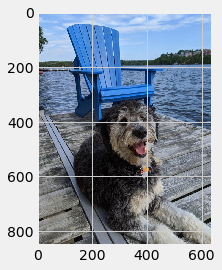

In [30]:
new_image = plt.imread("cute_dog_5.jpg")
plt.imshow(new_image)

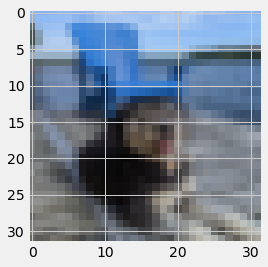

In [31]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [32]:
predictions = model.predict(np.array( [resized_image] ))
predictions

array([[0.3362813 , 0.00597718, 0.18123405, 0.02370046, 0.27832153,
        0.00747342, 0.03457642, 0.0042172 , 0.1102698 , 0.01794872]],
      dtype=float32)

In [33]:
classification[np.argmax(predictions)]

'airplane'

In [21]:
np.argmax(predictions)

1

In [16]:
classification[5]

'dog'